In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [337]:
#open data
with open("/home/hungday/Documents/python/Data-visualization-/Data_EX1.txt",'r') as f:
    lines = f.readlines() 
lines=lines[1:]
for i in range(len(lines)):
    lines[i]=lines[i].split()[1:]
for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j]=float(lines[i][j])
lines=lines[:-6]


In [338]:
lines

[[15.0, 18.0, 17.5, 18.5, 22.9, 27.0, 26.0, 26.8, 26.5, 23.6, 23.6, 16.8],
 [14.3, 17.6, 16.9, 19.1, 22.0, 28.3, 27.5, 26.4, 24.3, 24.3, 21.3, 18.5],
 [13.2, 18.1, 18.5, 20.5, 21.8, 25.4, 26.5, 28.1, 25.9, 23.9, 20.0, 16.9],
 [15.4, 19.8, 20.9, 21.8, 21.5, 25.8, 26.1, 27.3, 25.6, 24.1, 18.2, 18.4],
 [18.0, 17.5, 16.1, 18.9, 22.7, 25.6, 25.2, 28.1, 26.6, 24.1, 15.9, 15.2],
 [19.4, 15.9, 15.5, 18.2, 24.0, 25.9, 25.9, 27.6, 26.9, 21.5, 20.1, 18.3],
 [15.4, 17.5, 15.3, 20.1, 25.6, 27.7, 25.6, 25.6, 25.8, 21.3, 22.4, 20.6],
 [12.0, 16.7, 16.1, 21.0, 26.0, 27.5, 26.0, 27.4, 24.8, 22.7, 25.2, 20.5],
 [10.2, 15.6, 15.5, 21.9, 26.2, 28.3, 27.6, 27.6, 25.9, 24.4, 25.4, 18.5],
 [7.6, 16.4, 19.1, 23.5, 26.5, 28.3, 27.4, 27.0, 27.4, 24.2, 24.8, 18.4],
 [10.0, 18.7, 20.7, 23.3, 26.4, 28.3, 27.2, 25.4, 24.9, 24.9, 26.0, 20.3],
 [11.5, 19.2, 19.9, 24.4, 25.5, 29.4, 26.0, 26.9, 24.9, 25.3, 19.5, 19.8],
 [10.1, 17.9, 13.9, 23.8, 26.1, 99.0, 25.6, 26.4, 26.3, 24.8, 18.7, 19.7],
 [11.7, 21.3, 12.1, 22.0, 

In [339]:
df = pd.DataFrame(lines)
df.replace({-99: None, 99: None}, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

In [340]:
all_day=[[None]*3 for i in range(len(lines)*len(lines[0]))]
for i in range(len(lines[0])):
    for j in range(len(lines)):
        if i < 9 and j<9:
            all_day[i*len(lines)+j][0]='2009-0{month}-0{day}'.format(month=i+1,day=j+1)
        elif i< 9 and j >=9:
            all_day[i*len(lines)+j][0]='2009-0{month}-{day}'.format(month=i+1,day=j+1)
        elif i>=9 and j<9:
            all_day[i*len(lines)+j][0]='2009-{month}-0{day}'.format(month=i+1,day=j+1)
        elif i>=9 and j>=9:
            all_day[i*len(lines)+j][0]='2009-{month}-{day}'.format(month=i+1,day=j+1)
        all_day[i*len(lines)+j][1] = '00:00:00'
        if lines[j][i]==-99 or lines[j][i] == 99:
            all_day[i*len(lines)+j][2]=None
        else:
            all_day[i*len(lines)+j][2]=lines[j][i]
all_day_df=pd.DataFrame(all_day)
all_day_df

,0,1,2
0,2009-01-01,00:00:00,15.0
1,2009-01-02,00:00:00,14.3
2,2009-01-03,00:00:00,13.2
3,2009-01-04,00:00:00,15.4
4,2009-01-05,00:00:00,18.0
...,...,...,...
367,2009-12-27,00:00:00,15.0
368,2009-12-28,00:00:00,16.4
369,2009-12-29,00:00:00,18.0
370,2009-12-30,00:00:00,18.0


In [341]:

for i in range(len(all_day_df)):
    if all_day_df[0][i] == '2009-02-30' or all_day_df[0][i] == '2009-02-31' or all_day_df[0][i] == '2009-04-31' or all_day_df[0][i] == '2009-06-31' or all_day_df[0][i] == '2009-09-31' or all_day_df[0][i] == '2009-11-31':
        all_day_df = all_day_df.drop(i)
all_day_df

,0,1,2
0,2009-01-01,00:00:00,15.0
1,2009-01-02,00:00:00,14.3
2,2009-01-03,00:00:00,13.2
3,2009-01-04,00:00:00,15.4
4,2009-01-05,00:00:00,18.0
...,...,...,...
367,2009-12-27,00:00:00,15.0
368,2009-12-28,00:00:00,16.4
369,2009-12-29,00:00:00,18.0
370,2009-12-30,00:00:00,18.0


In [342]:
all_day_list=all_day_df[[0,2]].values.tolist()
all_day_list


[['2009-01-01', 15.0],
 ['2009-01-02', 14.3],
 ['2009-01-03', 13.2],
 ['2009-01-04', 15.4],
 ['2009-01-05', 18.0],
 ['2009-01-06', 19.4],
 ['2009-01-07', 15.4],
 ['2009-01-08', 12.0],
 ['2009-01-09', 10.2],
 ['2009-01-10', 7.6],
 ['2009-01-11', 10.0],
 ['2009-01-12', 11.5],
 ['2009-01-13', 10.1],
 ['2009-01-14', 11.7],
 ['2009-01-15', 9.4],
 ['2009-01-16', 12.8],
 ['2009-01-17', 15.9],
 ['2009-01-18', 16.3],
 ['2009-01-19', 17.3],
 ['2009-01-20', 19.4],
 ['2009-01-21', 16.9],
 ['2009-01-22', 17.7],
 ['2009-01-23', 12.8],
 ['2009-01-24', 10.3],
 ['2009-01-25', 13.0],
 ['2009-01-26', 11.5],
 ['2009-01-27', 13.6],
 ['2009-01-28', 15.0],
 ['2009-01-29', 15.2],
 ['2009-01-30', 13.2],
 ['2009-01-31', 15.4],
 ['2009-02-01', 18.0],
 ['2009-02-02', 17.6],
 ['2009-02-03', 18.1],
 ['2009-02-04', 19.8],
 ['2009-02-05', 17.5],
 ['2009-02-06', 15.9],
 ['2009-02-07', 17.5],
 ['2009-02-08', 16.7],
 ['2009-02-09', 15.6],
 ['2009-02-10', 16.4],
 ['2009-02-11', 18.7],
 ['2009-02-12', 19.2],
 ['2009-02-13

# EX1

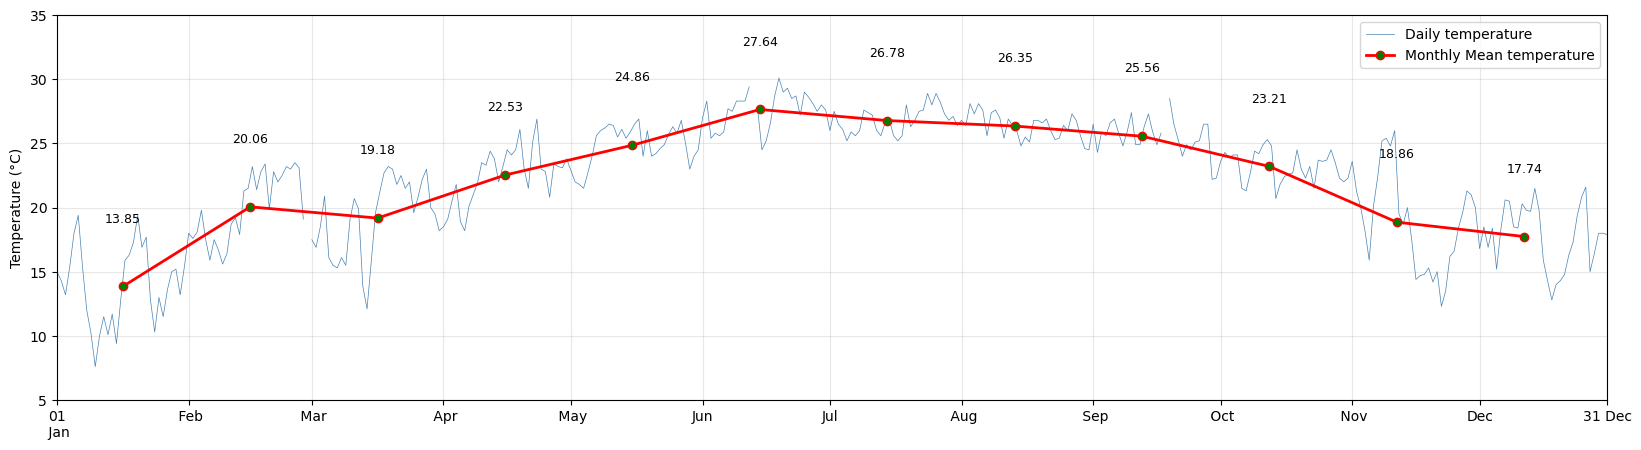

In [343]:
x=[]
y=[]
for i in range(len(all_day_list)):
    x.append(all_day_list[i][0])
    y.append(all_day_list[i][1])
plt.figure(figsize=(20,5))
plt.plot(x,y,color='steelblue', label='Daily temperature', linewidth=0.5)
monthly_x = np.arange(15.5, 12 * 30 + 1, 30) 
all_days_list_copy = all_day_list.copy()
# Calculate the average temperature of each month
for i in range(len(all_days_list_copy)):
    if math.isnan(all_days_list_copy[i][1]):
        all_day_list[i][1] = 0
avg_temp = [None for i in range(12)]
num_day_month = 0
num_day_prev = 0
for i in range(12):
    avg_month = 0
    num_day_prev = num_day_prev + num_day_month 
    if i == 1: 
        # February in 2008 has 29 days
        num_day_month = 29
    elif i == 3 or i == 5 or i == 8 or i == 10:
        num_day_month = 30
    else:
        num_day_month = 31
    num_day_cal = num_day_month
    for j in range(num_day_month):
        # Calculate the average temperature of each month
        if all_day_list[num_day_prev+j][1] == 0:
            # If the temperature of a day is missing, we will not calculate it
            num_day_cal = num_day_cal - 1
        avg_month += all_day_list[num_day_prev+j][1]
    avg_temp[i] = avg_month/num_day_cal
df_min=df.min()
df_max=df.max()
df_mean=df.mean()
months=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov","Dec"]
plt.plot(monthly_x,avg_temp,color='red',linewidth=2, marker='o', markersize=6, markerfacecolor='green',label='Monthly Mean temperature')
for date, temp in zip(monthly_x, avg_temp):
    plt.text(date, temp + 5, f'{temp:.2f}', ha='center', fontsize=9)
plt.xticks([0, 31, 60, 91, 121, 152, 182, 213, 244, 274, 305, 335, 365], ["01\n Jan", " Feb", " Mar", " Apr", " May", "Jun", "Jul", " Aug", " Sep", " Oct", " Nov", "Dec","31 Dec"])
plt.grid(True)
plt.ylim(5,35)
plt.xlim(0,365)
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# EX2

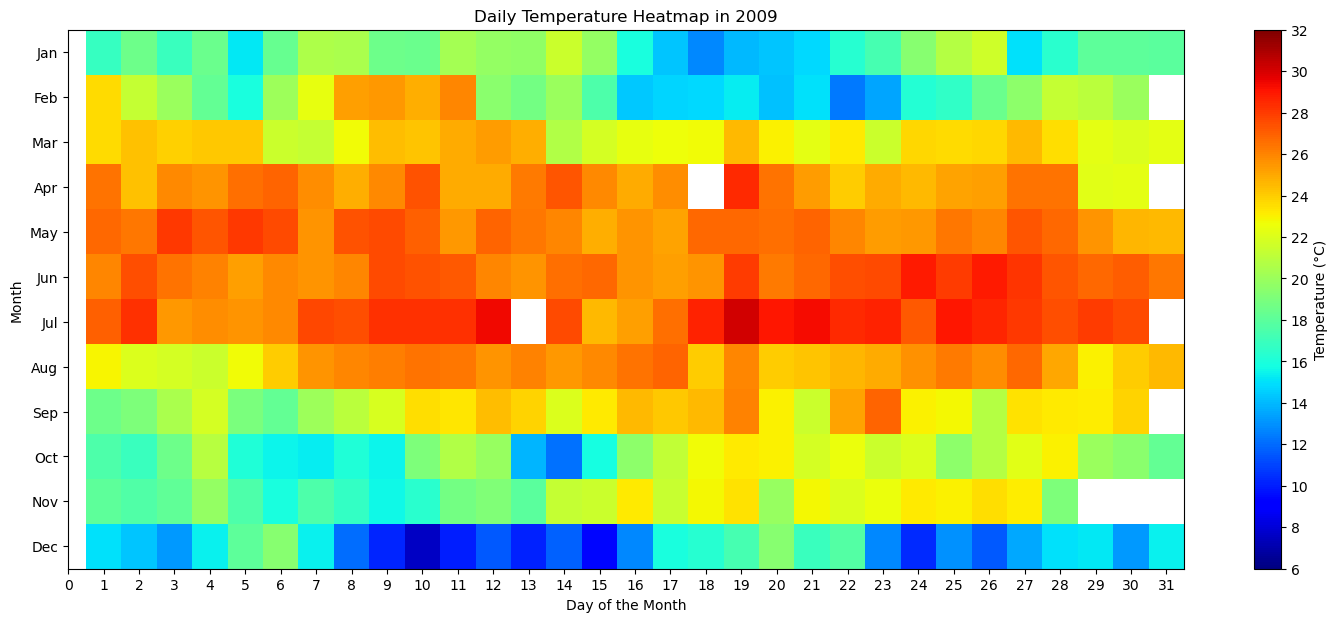

In [344]:
x_axis = np.arange(1,32,1)
y_axis = np.arange(1,13,1)
data=df.T
x_axis, y_axis = np.meshgrid(x_axis, y_axis)
plt.figure(figsize=(18,7))
cm=plt.pcolormesh(x_axis,y_axis,data,cmap='jet',vmin=6,vmax=32)
bar=plt.colorbar(cm)
bar.set_label('Temperature (°C)')
bar.set_ticks(range(6,33,2))  
bar.set_ticklabels(range(6,33,2))
plt.xticks(range(32),range(32))
plt.yticks(range(12,0,-1), months)
plt.xlabel('Day of the Month')
plt.ylabel('Month')
plt.title("Daily Temperature Heatmap in 2009")
plt.subplots_adjust( wspace = 0.2)
plt.show()

# EX3

<Figure size 1500x500 with 0 Axes>

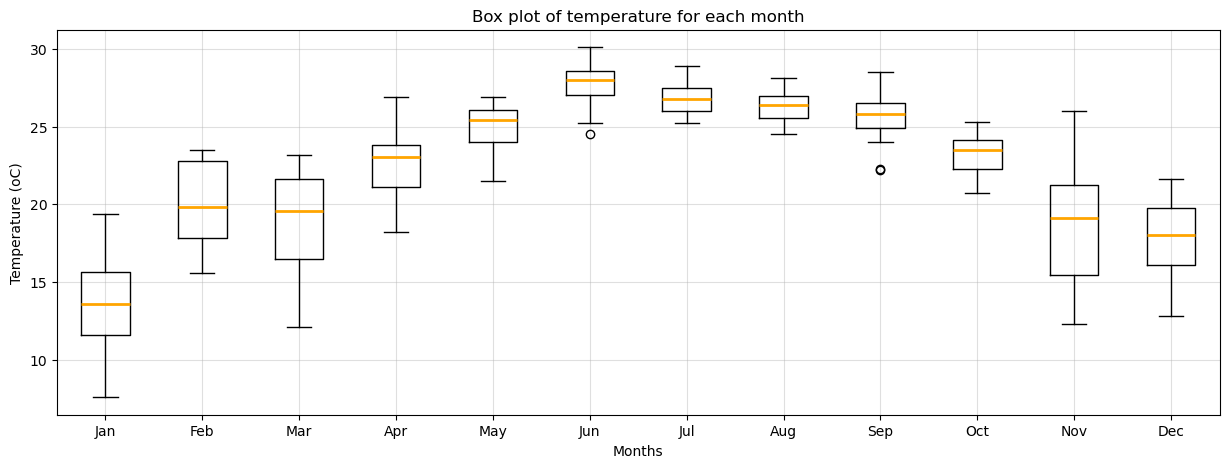

In [345]:
plt.figure(figsize=(15,5))
box = df.plot(kind='box', figsize=(15,5), color='black', medianprops=dict(color='orange', linewidth=2))
plt.xticks(list(range(1,13)), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.title("Box plot of temperature for each month")
plt.xlabel("Months")
plt.ylabel("Temperature (oC)")
plt.grid(alpha=0.4,zorder=0)
plt.show()

# Ex4

Number of stations inside Quang Ninh: 630


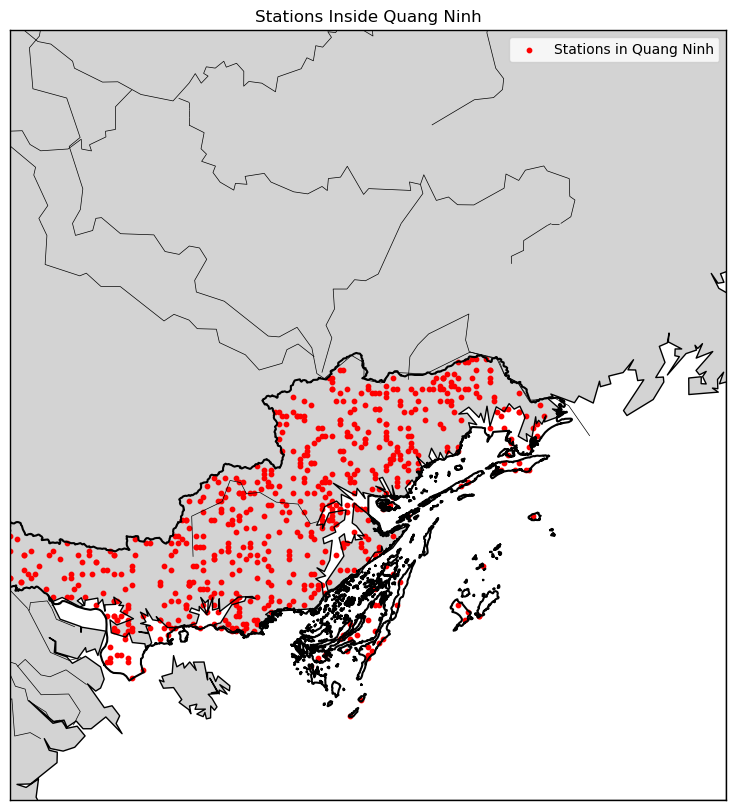

In [364]:
from matplotlib.path import Path
from numpy import *
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import shapefile
import matplotlib.patches as patches
import matplotlib.path as mplp
# Reload the shapefile and reset variables
shapefile_path='/home/hungday/Documents/python/Data-visualization-/gadm41_VNM_0/gadm41_VNM_1.shp'
sf = shapefile.Reader(shapefile_path)
shapes = sf.shapes()
records = sf.records()

# Set up Basemap for Quang Ninh
fig, ax = plt.subplots(figsize=(12, 10))
m = Basemap(
    projection='merc',
    llcrnrlat=20.5, urcrnrlat=22.5,  # Latitude range for Quang Ninh
    llcrnrlon=106.5, urcrnrlon=108.5,  # Longitude range for Quang Ninh
    resolution='i'
)

# Draw basemap features
m.drawcoastlines()
m.drawcountries()
m.drawrivers()
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='lightgrey', lake_color='aqua')

# Plot Quang Ninh from the shapefile and collect the boundary
quang_ninh_polygon = []
for shape, record in zip(shapes, records):
    if "Quang Ninh" in record:  # Check for Quang Ninh in attributes
        points = np.array(shape.points)
        parts = list(shape.parts) + [len(points)]
        for i in range(len(parts) - 1):
            polygon_points = points[parts[i]:parts[i+1]]
            quang_ninh_polygon.append(mplp.Path(polygon_points))
            x, y = m(polygon_points[:, 0], polygon_points[:, 1])
            ax.plot(x, y, marker=None, color='black', linewidth=1.5)

# Filter stations inside Quang Ninh
stations_inside = []
for lon, lat in zip(x_location, y_location):
    for polygon in quang_ninh_polygon:
        if polygon.contains_point((lon, lat)):
            stations_inside.append((lon, lat))
            break

# Plot the stations inside Quang Ninh
stations_inside = np.array(stations_inside)
x, y = m(stations_inside[:, 0], stations_inside[:, 1])
ax.scatter(x, y, c='red', s=10, label="Stations in Quang Ninh")

# Display the count of stations inside Quang Ninh
stations_count = len(stations_inside)
print(f"Number of stations inside Quang Ninh: {stations_count}")

plt.title("Stations Inside Quang Ninh")
plt.legend()
plt.show()

# ex5

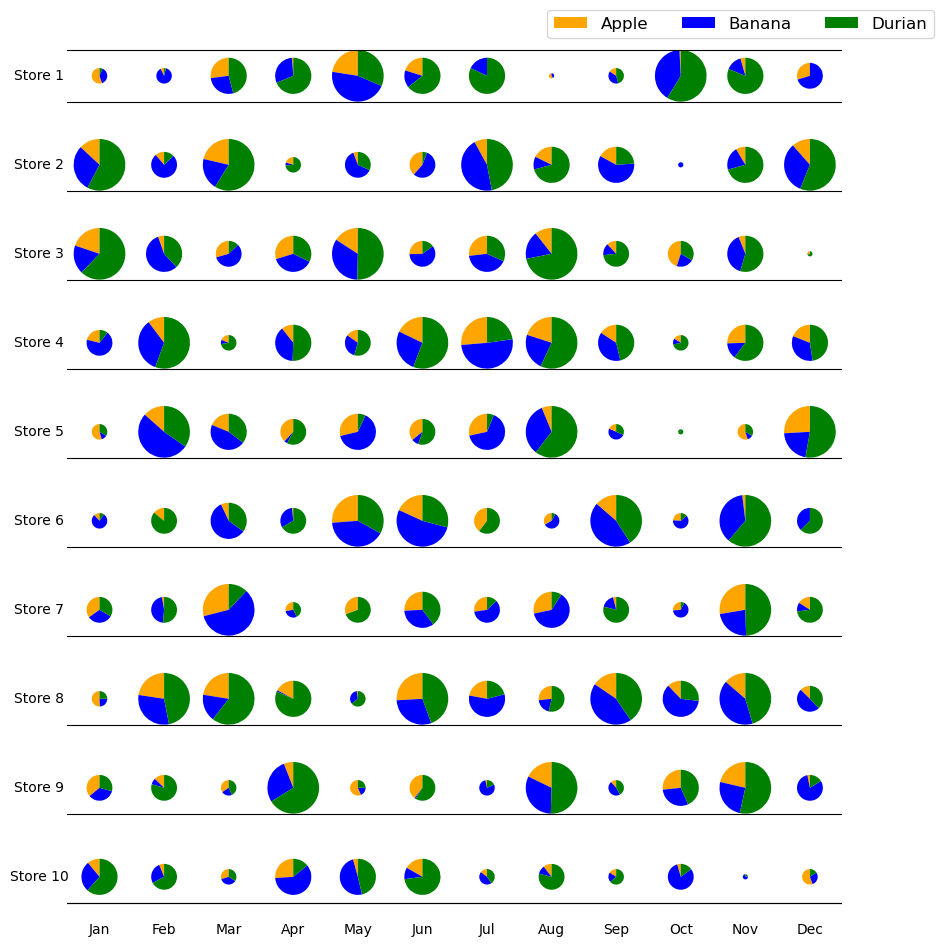

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize sales data
np.random.seed(180793)
apple = np.random.randint(0, 30, size=(10, 12))       # 10 stores, 12 months
banana = np.random.randint(0, 60, size=(10, 12))      # 10 stores, 12 months
durian = np.random.randint(0, 80, size=(10, 12))      # 10 stores, 12 months

# Total sales
total_sales = apple + banana + durian

# Radius based on total sales
def calculate_radius(sales):
    if sales < 40:
        return 0.1
    elif sales < 60:
        return 0.3
    elif sales < 80:
        return 0.5
    elif sales < 100:
        return 0.7
    else:
        return 1.0


fig, axes = plt.subplots(10, 12, figsize=(10, 10), gridspec_kw={'hspace': 0, 'wspace': 0})

# Plot each pie chart for each store and month
for i in range(10):  # Stores (rows)
    for j in range(12):  # Months (columns)
        sales = [apple[i, j], banana[i, j], durian[i, j]]
        total = sum(sales)
        radius = calculate_radius(total)
        
        # Plot the pie chart in the respective cell
        wedges, texts = axes[i, j].pie(
            sales,
            colors=['orange', 'blue', 'green'],
            radius=radius,blue
            startangle=90
        )
        
        # Remove ticks for cleaner appearance
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
        axes[i, j].set_aspect('equal')

# Add row labels for stores
for ax, row_label in zip(axes[:, 0], [f'Store {i + 1}' for i in range(10)]):
    ax.set_ylabel(row_label, rotation=0, labelpad=20, fontsize=10, va='center')

# Add column labels for months at the bottom
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for ax, col_label in zip(axes[-1], months):  # Bottom row for months
    ax.set_xlabel(col_label, fontsize=10, labelpad=10)

# Add horizontal legend at the top
fig.legend(
    ['Apple', 'Banana', 'Durian'], 
    loc='upper right', 
    bbox_to_anchor=(1, 1.02), 
    ncol=3, 
    fontsize=12, 
    frameon=True
)

# Add separators between stores (rows)
for i in range(-1, 10):
    for ax in axes[i, :]:
        ax.axhline(y=-1, xmin=-100000, xmax=1000000, color='black', linestyle='-', linewidth=0.8)
# for i in range(0,10):
#     fig.add_artist(plt.Line2D(
#         [0.05, 0.95],  # Start and end positions as fractions of the figure width
#         [1 - (i + 0) / 10, 1 - (i + 0) / 10],  # Vertical position on each store row
#         transform=fig.transFigure,
#         color='black',
#         linewidth=1.0
#     ))

for ax in axes[0, :]:
    ax.axhline(y=1, xmin=0, xmax=1, color='black', linestyle='-', linewidth=0.8)
# Ensure space for the legend and bottom labels
plt.subplots_adjust(top=0.99, bottom=0.1)

plt.show()


# ex6

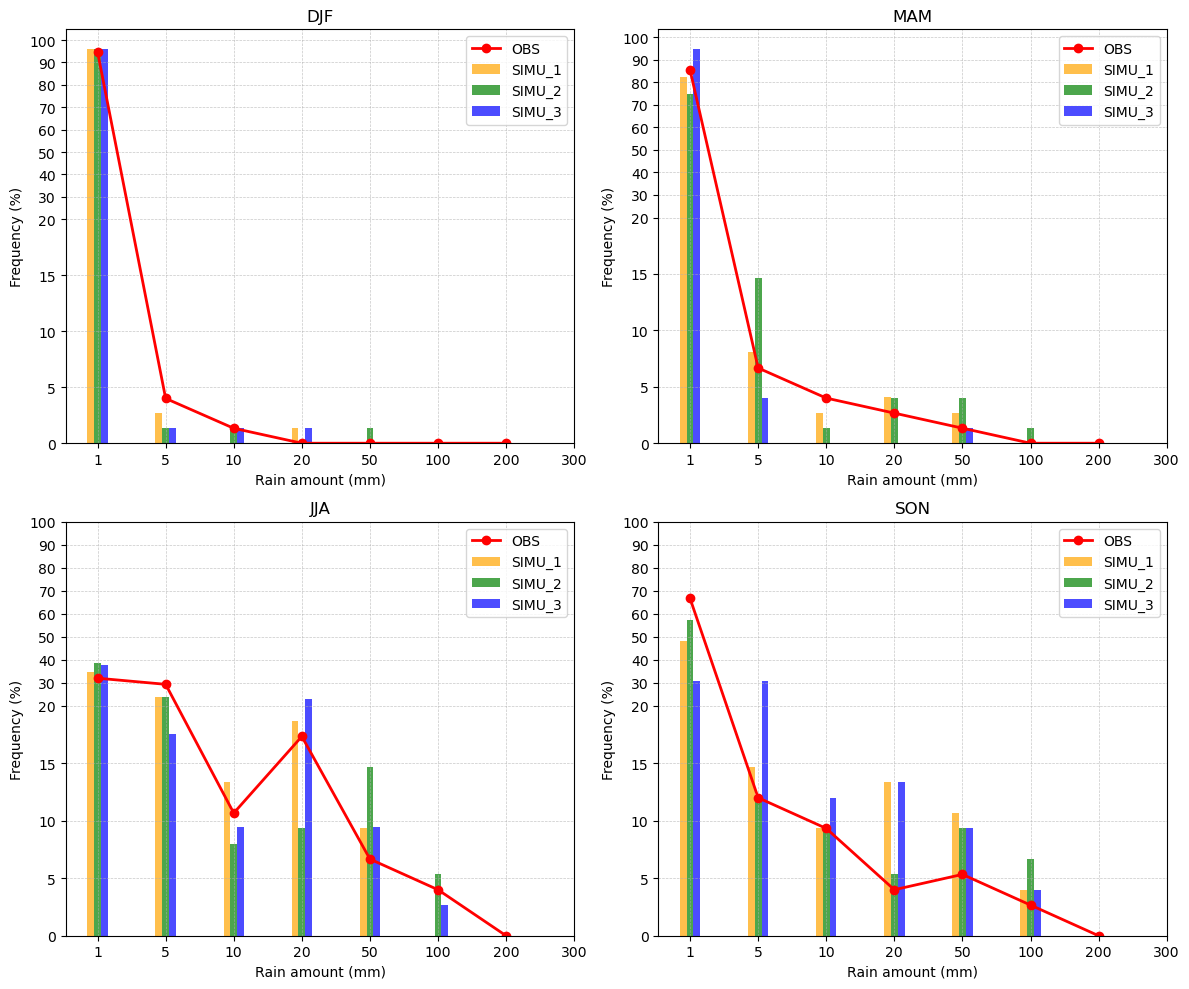

In [351]:
# Load and clean data from Data_EX6.txt, and plot precipitation frequency by threshold in 4 seasons

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define file path
file_path = 'data/Data_EX6.txt'

# Read the file manually to separate datasets
with open(file_path, 'r') as file:
    lines = file.readlines()

# Initialize containers for blocks of data
data_blocks = {}
current_key = None
data_lines = []

# Parse the file to separate datasets
for line in lines:
    line = line.strip()
    if line in {"OBS", "SIMU_1", "SIMU_2", "SIMU_3"}:
        if current_key:
            data_blocks[current_key] = pd.DataFrame(data_lines).apply(pd.to_numeric, errors='coerce')
        current_key = line
        data_lines = []
    else:
        data_lines.append(line.split())

# Add the final block
if current_key and data_lines:
    data_blocks[current_key] = pd.DataFrame(data_lines).apply(pd.to_numeric, errors='coerce')

# Remove missing values (-99) from all datasets
for key in data_blocks.keys():
    data_blocks[key].replace(-99, np.nan, inplace=True)

# Filter out rows where OBS data is missing
obs_data = data_blocks["OBS"]
valid_indices = obs_data.dropna().index
for key in data_blocks.keys():
    data_blocks[key] = data_blocks[key].loc[valid_indices]

# Combine all simulations with OBS for analysis
combined_data = pd.concat(data_blocks, axis=1)

# Define thresholds and seasons
thresholds = [0, 1, 5, 10, 20, 50, 100, 300]
season_months = {
    "DJF": [12, 1, 2],
    "MAM": [3, 4, 5],
    "JJA": [6, 7, 8],
    "SON": [9, 10, 11]
}

# Plot frequency distributions by threshold for each season
# Plot precipitation frequency by threshold with bar plots for simulations and line for OBS

# Update plot: OBS line in red, larger and colorful bars for each simulation

# Customizing Y-axis with large scale from 0-10-15-20 and compressed 20-100 (20, 30, 40...)
def transform_y(y):
    """Custom transformation for Y-axis."""
    return y if y <= 20 else 20 + (y - 20) / 5

def inverse_transform_y(y):
    """Inverse transformation for Y-axis."""
    return y if y <= 20 else 20 + (y - 20) * 5

# Increase the width of the bars horizontally

# Combine the customized Y-axis and evenly spaced X-axis ticks

plt.figure(figsize=(12, 10))
colors = ['orange', 'green', 'blue']  # Colors for SIMU_1, SIMU_2, SIMU_3

# Define custom tick positions and labels for X-axis
x_tick_positions = range(len([ 1, 5, 10, 20, 50, 100, 200, 300]))
x_tick_labels = [ 1, 5, 10, 20, 50, 100, 200, 300]

for i, (season, months) in enumerate(season_months.items(), start=1):
    ax = plt.subplot(2, 2, i)
    
    # Plot OBS as a red line plot
    obs_season_data = data_blocks["OBS"].iloc[:, months]
    obs_flattened = obs_season_data.values.flatten()
    obs_flattened = obs_flattened[~np.isnan(obs_flattened)]  # Remove NaNs
    if len(obs_flattened) > 0:
        obs_freq, obs_edges = np.histogram(obs_flattened, bins=thresholds, density=False)
        obs_freq_percentage = 100 * obs_freq / obs_freq.sum()  # Convert to percentages
        transformed_obs = [transform_y(y) for y in obs_freq_percentage]
        plt.plot(range(len(obs_edges[:-1])), transformed_obs, marker='o', label="OBS", color='red', linewidth=2)

    # Plot simulations as larger and colorful bar plots
    for idx, source in enumerate(["SIMU_1", "SIMU_2", "SIMU_3"]):
        simu_season_data = data_blocks[source].iloc[:, months]
        simu_flattened = simu_season_data.values.flatten()
        simu_flattened = simu_flattened[~np.isnan(simu_flattened)]  # Remove NaNs
        if len(simu_flattened) > 0:
            simu_freq, simu_edges = np.histogram(simu_flattened, bins=thresholds, density=False)
            simu_freq_percentage = 100 * simu_freq / simu_freq.sum()  # Convert to percentages
            transformed_simu = [transform_y(y) for y in simu_freq_percentage]
            bar_width = 0.3 / 3  # Divide bar width by 3 for spacing
            bar_positions = range(len(simu_edges[:-1]))
            plt.bar(
                [p + bar_width * (idx - 1) for p in bar_positions], 
                transformed_simu, 
                width=bar_width, 
                label=source, 
                color=colors[idx], 
                alpha=0.7
            )

    # Customize X-axis for equal spacing and set labels
    ax.set_xticks(x_tick_positions)
    ax.set_xticklabels(x_tick_labels)

    # Customize Y-axis with large scale for 0-10-15-20 and compressed for 20-100
    y_ticks = [0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    y_labels = [str(y) for y in y_ticks]
    ax.set_yticks([transform_y(y) for y in y_ticks])
    ax.set_yticklabels(y_labels)

    plt.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)
    plt.title(season)
    plt.xlabel("Rain amount (mm)")
    plt.ylabel("Frequency (%)")
    plt.legend()

plt.tight_layout()
plt.show()

